### **Data Analytics Project: Blinkit Sales Analysis**

In [1]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Blinkit_analysis_data/blinkit_data.csv')
df.shape

(8523, 12)

Sample Data

In [4]:
df.head(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
df.tail(5)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [6]:
print('Size of Data: ', df.shape)

Size of Data:  (8523, 12)


In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [8]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [9]:
df['Item Fat Content'].value_counts()

,count
Item Fat Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [10]:
df['Item Fat Content'] = df['Item Fat Content'].replace({'LF': 'Low Fat',
                                'low fat':'Low Fat',
                                'reg':'Regular'})

In [11]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat'], dtype=object)

In [12]:
categorical_cols = df.select_dtypes(include='object').columns.to_list()
numerical_cols = df.select_dtypes(include=['int', 'float']).columns.to_list()

print(len(categorical_cols), len(numerical_cols))

7 5


Displaying all categorical and numerical columns

In [13]:
for col in categorical_cols:
  print(f'{col} : {df[col].unique()}')
  print('-'*50)

Item Fat Content : ['Regular' 'Low Fat']
--------------------------------------------------
Item Identifier : ['FDX32' 'NCB42' 'FDR28' ... 'FDU60' 'NCX53' 'FDE52']
--------------------------------------------------
Item Type : ['Fruits and Vegetables' 'Health and Hygiene' 'Frozen Foods' 'Canned'
 'Soft Drinks' 'Household' 'Snack Foods' 'Meat' 'Breads' 'Hard Drinks'
 'Others' 'Dairy' 'Breakfast' 'Baking Goods' 'Seafood' 'Starchy Foods']
--------------------------------------------------
Outlet Identifier : ['OUT049' 'OUT018' 'OUT046' 'OUT013' 'OUT045' 'OUT017' 'OUT010' 'OUT027'
 'OUT035' 'OUT019']
--------------------------------------------------
Outlet Location Type : ['Tier 1' 'Tier 3' 'Tier 2']
--------------------------------------------------
Outlet Size : ['Medium' 'Small' 'High']
--------------------------------------------------
Outlet Type : ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']
--------------------------------------------------


In [14]:
for col in numerical_cols:
  print(f'{col}')
  print('-'*50)

Outlet Establishment Year
--------------------------------------------------
Item Visibility
--------------------------------------------------
Item Weight
--------------------------------------------------
Sales
--------------------------------------------------
Rating
--------------------------------------------------


### **Business Requirments**

**KPI's Requirement**

In [15]:
# Total Sales
total_sales = df['Sales'].sum()
print(f'Total Sales : ${total_sales:.0f}')

# Average Sale
avg_sale = df['Sales'].mean()
print(f'Average Sales : ${avg_sale:.0f}')

# No. of Items Sold
num_of_items = df['Sales'].count()
print(f'No. of Items Sold : {num_of_items}')

# Average Ratings
avg_ratings = df['Rating'].mean()
print(f'Average Ratings : {avg_ratings:.0f}')

Total Sales : $1201681
Average Sales : $141
No. of Items Sold : 8523
Average Ratings : 4


**Chart's Requirement**

**1. Total Sales by Fat Content**

In [16]:
sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()
# sales_by_fat

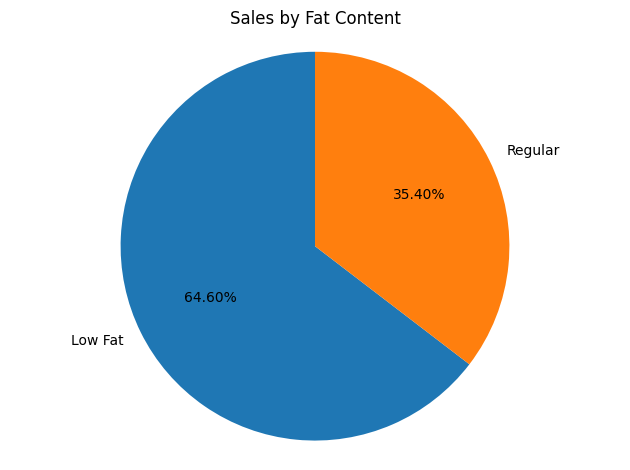

In [17]:
plt.pie(sales_by_fat, labels=sales_by_fat.index, autopct='%.2f%%', startangle=90)

plt.title('Sales by Fat Content')
plt.axis('equal')

plt.tight_layout()
plt.savefig("sales_by_fat_content.png", dpi=300, bbox_inches="tight")
plt.show()

**2. Total Sales by Item Type**

In [18]:
sales_by_type = df.groupby('Item Type')['Sales'].sum()
# sales_by_type

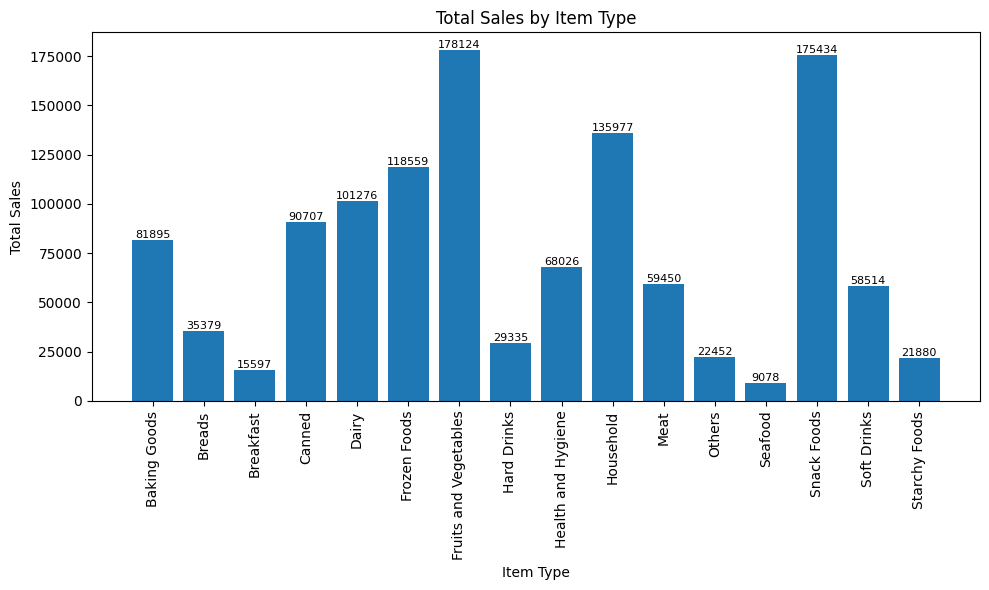

In [19]:
plt.figure(figsize=(10, 6))

bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type', fontsize=12)

for bar in bars:
  plt.text(bar.get_x()+ bar.get_width()/2, bar.get_height(),
           f'{bar.get_height():.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig("sales_by_item_type.png", dpi=300, bbox_inches="tight")
plt.show()

**3. Fat Content by Outlet for Total Sales**

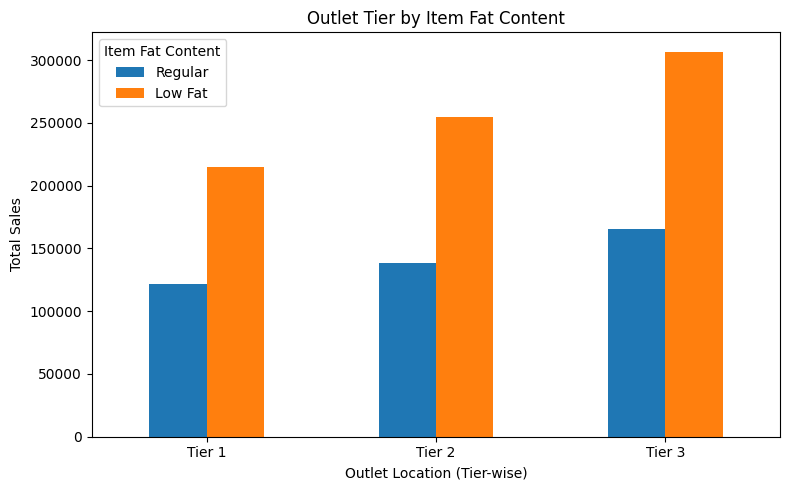

In [20]:
grouped = df.groupby(['Outlet Location Type', 'Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular', 'Low Fat']]


ax = grouped.plot(kind='bar', figsize=(8, 5), title='Outlet Tier by Item Fat Content')
plt.xticks(rotation=0)
plt.xlabel('Outlet Location (Tier-wise)')
plt.ylabel('Total Sales')

plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.savefig("fat_content_by_outlet.png", dpi=300, bbox_inches="tight")
plt.show()

**4. Total Sales by Outlet Establishment**

In [21]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
sales_by_year

,Sales
Outlet Establishment Year,
1998,204522.2570
2000,131809.0156
2010,132113.3698
2011,78131.5646
2012,130476.8598
2015,130942.7782
2017,133103.9070
2020,129103.9564
2022,131477.7724


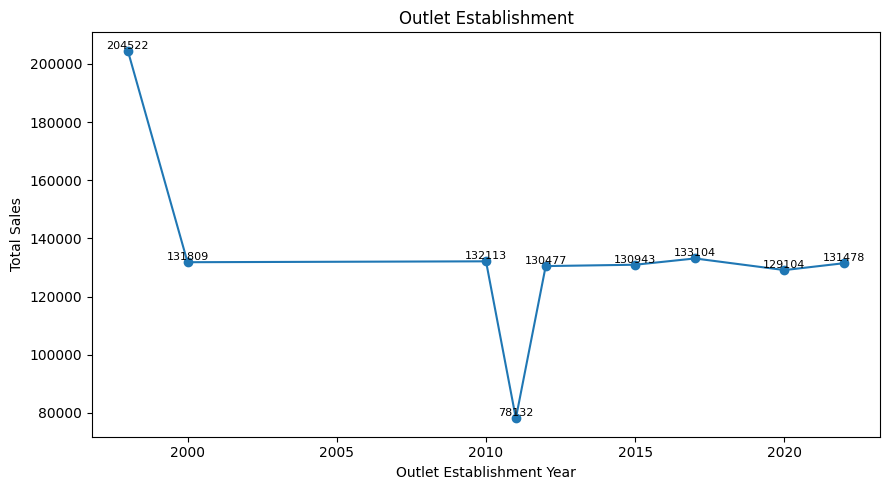

In [22]:
plt.figure(figsize=(9, 5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x, y, f'{y:.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig("sales_by_outlet_establishment.png", dpi=300, bbox_inches="tight")
plt.show()

**5. Sales by Outlet Size**

In [23]:
sales_by_size = df.groupby('Outlet Size')['Sales'].sum()
# sales_by_size

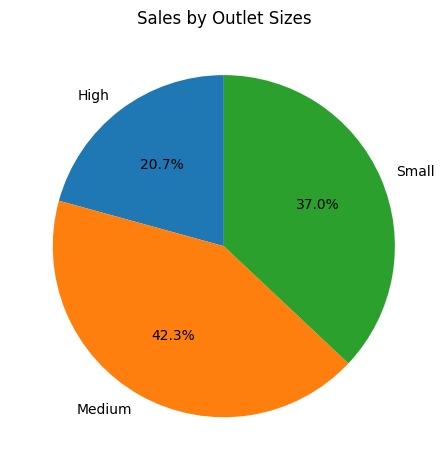

In [24]:
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)

plt.title('Sales by Outlet Sizes')
plt.tight_layout()
plt.savefig("sales_by_outlet_size.png", dpi=300, bbox_inches="tight")
plt.show()

**6. Sales by Outlet Location**

In [25]:
sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Sales', ascending=False)
# sales_by_location

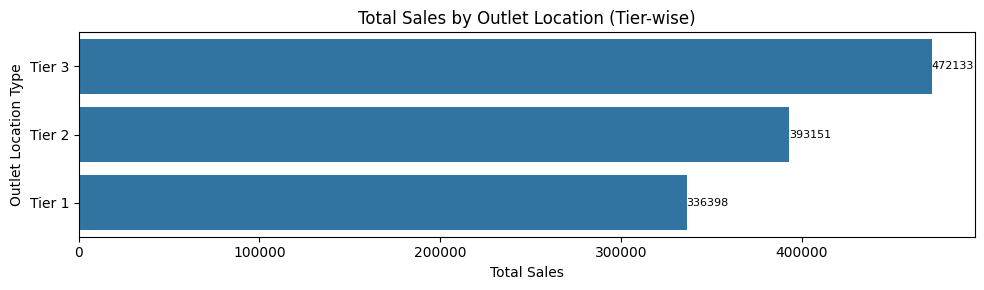

In [26]:
plt.figure(figsize=(10, 3)) #Smaller height, enough width
ax = sns.barplot(x='Sales', y='Outlet Location Type', data=sales_by_location)

for bar in ax.containers:
  ax.bar_label(bar, fmt='%.0f', fontsize=8, label_type='edge')

plt.title('Total Sales by Outlet Location (Tier-wise)')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.savefig("sales_by_outlet_location.png", dpi=300, bbox_inches="tight")
plt.show()

**7. Sales by Item Visibility**

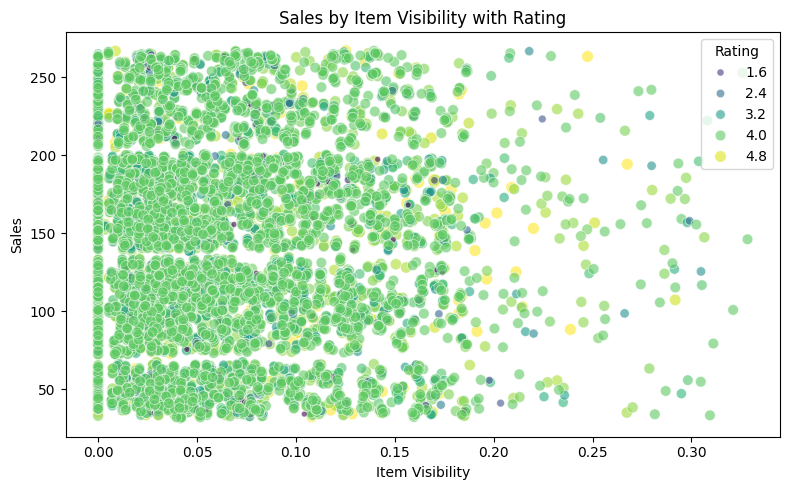

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Item Visibility', y='Sales', hue='Rating', size='Rating', data=df, alpha=0.6, palette='viridis')

plt.title('Sales by Item Visibility with Rating')
plt.xlabel('Item Visibility')
plt.ylabel('Sales')

plt.tight_layout()
plt.savefig("sales_by_item_visibility.png", dpi=300, bbox_inches="tight")
plt.show()

**8. Sales by Outlet Type**

In [28]:
sales_by_out_type = df.groupby('Outlet Type')['Sales'].sum().reset_index()
sales_by_out_type = sales_by_out_type.sort_values('Sales', ascending=False)
# sales_by_out_type

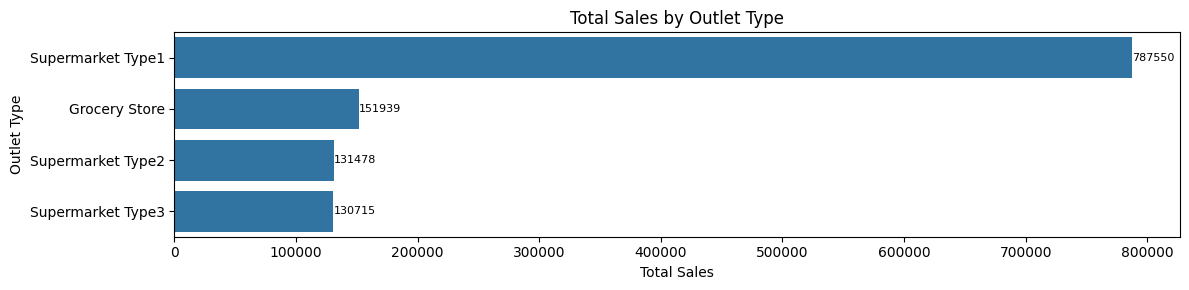

In [29]:
plt.figure(figsize=(12, 3))
ax = sns.barplot(x='Sales', y='Outlet Type', data=sales_by_out_type)

for bar in ax.containers:
  ax.bar_label(bar, fmt='%.0f', fontsize=8, label_type='edge')

plt.title('Total Sales by Outlet Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Type')

plt.tight_layout()
plt.savefig("sales_by_outlet_type.png", dpi=300, bbox_inches="tight")
plt.show()

**9. Top 10 Selling Items**

In [30]:
top_items = df.groupby('Item Identifier')['Sales'].sum().reset_index()
top_items = top_items.sort_values('Sales', ascending=False)
# top_items

top10_items = top_items[:10]
# top10_items

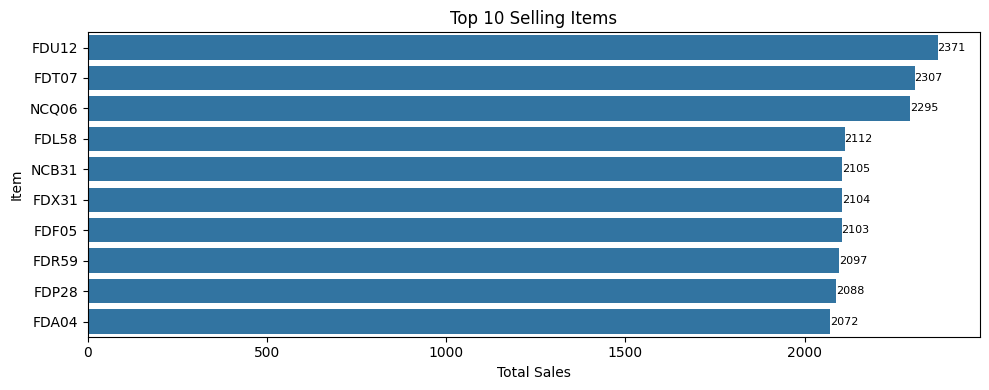

In [31]:
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='Sales', y='Item Identifier', data=top10_items)

for bar in ax.containers:
  ax.bar_label(bar, fmt='%.0f', fontsize=8, label_type='edge')

plt.title('Top 10 Selling Items')
plt.xlabel('Total Sales')
plt.ylabel('Item')

plt.tight_layout()
plt.savefig("top10_selling_items.png", dpi=300, bbox_inches="tight")
plt.show()